Data Synthesis Playabout
========================

In [68]:
from PIL import Image
from math import floor
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.interpolation import rotate

Load an image, convert it to a numpy array:

In [18]:
im = Image.open("letterA.png")
im_as_array = np.array([[im.getpixel((x,y))[0] for x in range(im.width)] for y in range(im.height)])

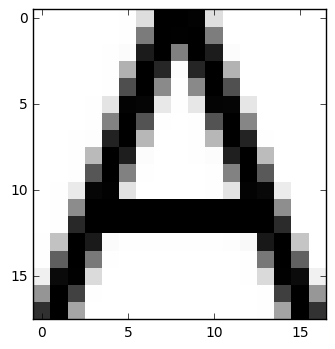

In [10]:
plt.imshow(im_as_array, cmap='gray', interpolation='none')
plt.show()

We can rotate the glyph using `rotate` from `scipy`:

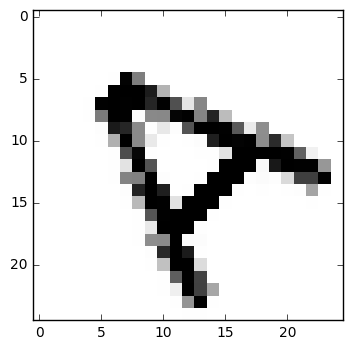

In [23]:
rotated_im = rotate(im_as_array, 45, cval=255, order=0)
plt.imshow(rotated_im, cmap='gray', interpolation='none')
plt.show()

Let's crop the image and round the pixel values to black or white:

In [51]:
def normalise(array, threshold = 180):
    return np.array([[255.0 if array[x,y] >= threshold else 0.0 for x in range(array.shape[1])] for y in range(array.shape[0])])
def crop(array):
    minx = next(x for x in range(array.shape[1]) if any([i < 255.0 for i in array[x,:]]))
    miny = next(y for y in range(array.shape[0]) if any([i < 255.0 for i in array[:,y]]))
    maxx = next(x for x in reversed(range(array.shape[1])) if any([i < 255.0 for i in array[x,:]]))
    maxy = next(y for y in reversed(range(array.shape[0])) if any([i < 255.0 for i in array[:,y]]))
    return array[minx:(maxx+1),miny:(maxy+1)]

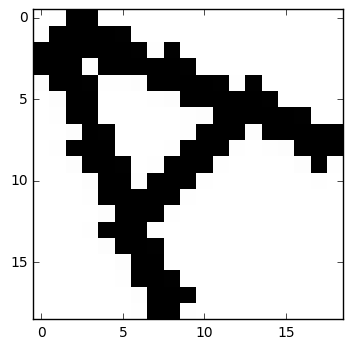

In [53]:
cropped_rotated_im = crop(normalise(rotated_im))
plt.imshow(cropped_rotated_im, cmap='gray', interpolation='none')
plt.show()

Now let's generate a 'fuzzy' background and pop the 'A' glyph somewhere on top of it:

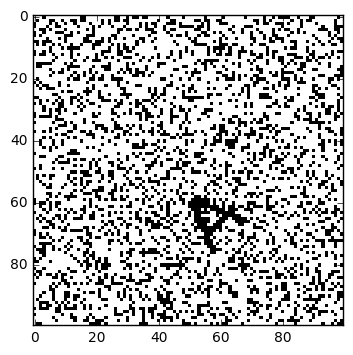

In [80]:
input_width, input_height = 100, 100
background = normalise(np.array([[random.uniform(150.0, 255.0) for x in range(input_width)] for y in range(input_height)]))
glyph_x = floor(random.uniform(0, background.shape[1] - cropped_rotated_im.shape[1]))
glyph_y = floor(random.uniform(0, background.shape[0] - cropped_rotated_im.shape[0]))
composite = background.copy()
for x in range(cropped_rotated_im.shape[0]):
    for y in range(cropped_rotated_im.shape[1]):
        composite[glyph_x + x, glyph_y + y] = 255.0 - min(255.0, 2.0*255.0 - cropped_rotated_im[x,y] - composite[glyph_x + x, glyph_y + y])
plt.imshow(composite, cmap='gray', interpolation='none')
plt.show()